In [9]:
import bt

In [10]:
%matplotlib inline

In [11]:
# fetch some data
data = bt.get('spy,agg', start='2010-01-01')
print(data.head())

                  spy        agg
Date                            
2010-01-04  89.225433  74.942795
2010-01-05  89.461586  75.283775
2010-01-06  89.524582  75.240242
2010-01-07  89.902512  75.153168
2010-01-08  90.201645  75.196709


In [12]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [13]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

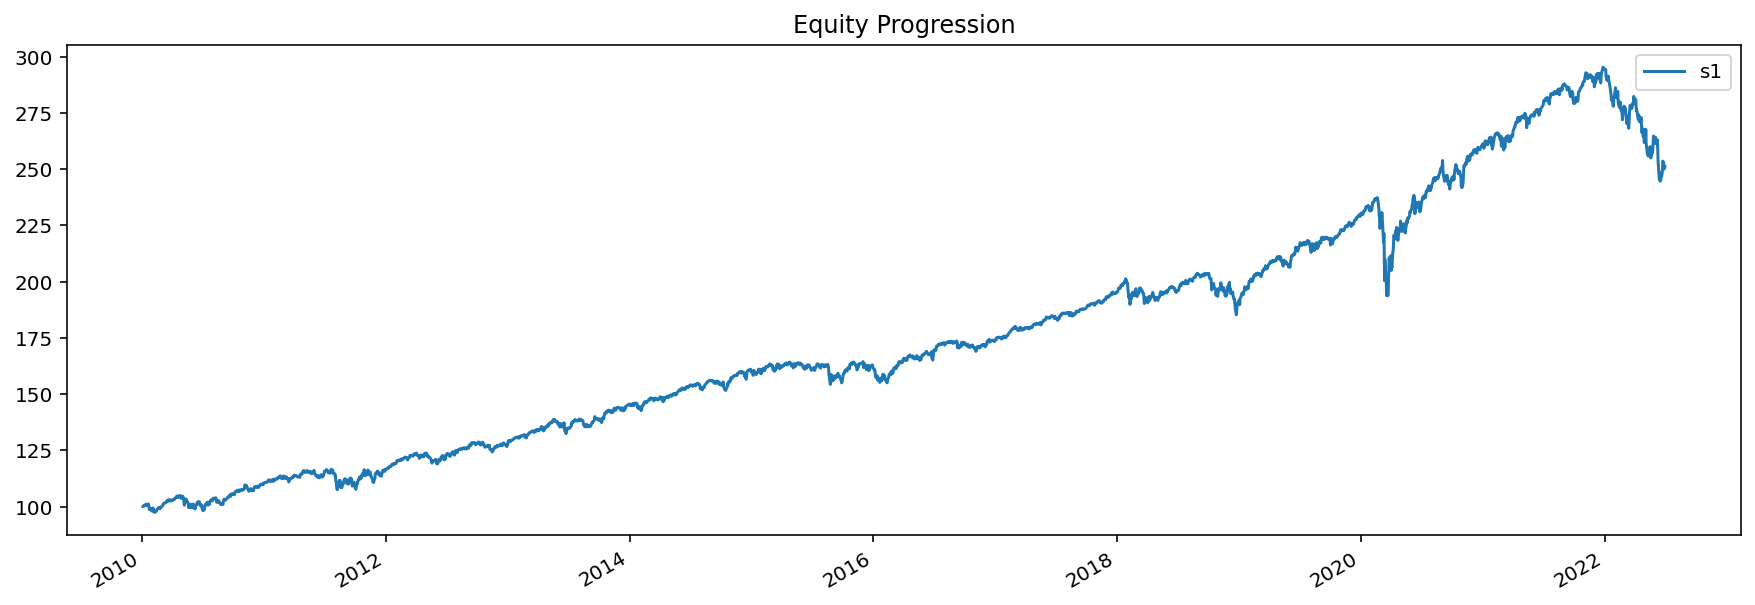

In [15]:
# first let's see an equity curve
res.plot();

In [16]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2022-06-30
Risk-free rate       0.00%

Total Return         151.12%
Daily Sharpe         0.90
Daily Sortino        1.36
CAGR                 7.65%
Max Drawdown         -18.42%
Calmar Ratio         0.42

MTD                  -4.58%
3m                   -10.89%
6m                   -14.83%
YTD                  -14.71%
1Y                   -9.78%
3Y (ann.)            5.18%
5Y (ann.)            6.47%
10Y (ann.)           7.38%
Since Incep. (ann.)  7.65%

Daily Sharpe         0.90
Daily Sortino        1.36
Daily Mean (ann.)    7.75%
Daily Vol (ann.)     8.62%
Daily Skew           -0.98
Daily Kurt           16.56
Best Day             4.77%
Worst Day            -6.63%

Monthly Sharpe       1.07
Monthly Sortino      1.93
Monthly Mean (ann.)  7.87%
Monthly Vol (ann.)   7.37%
Monthly Skew         -0.37
Monthly Kurt         1.54
Best Month           7.57%
Worst Month          -6.44%

Yearl

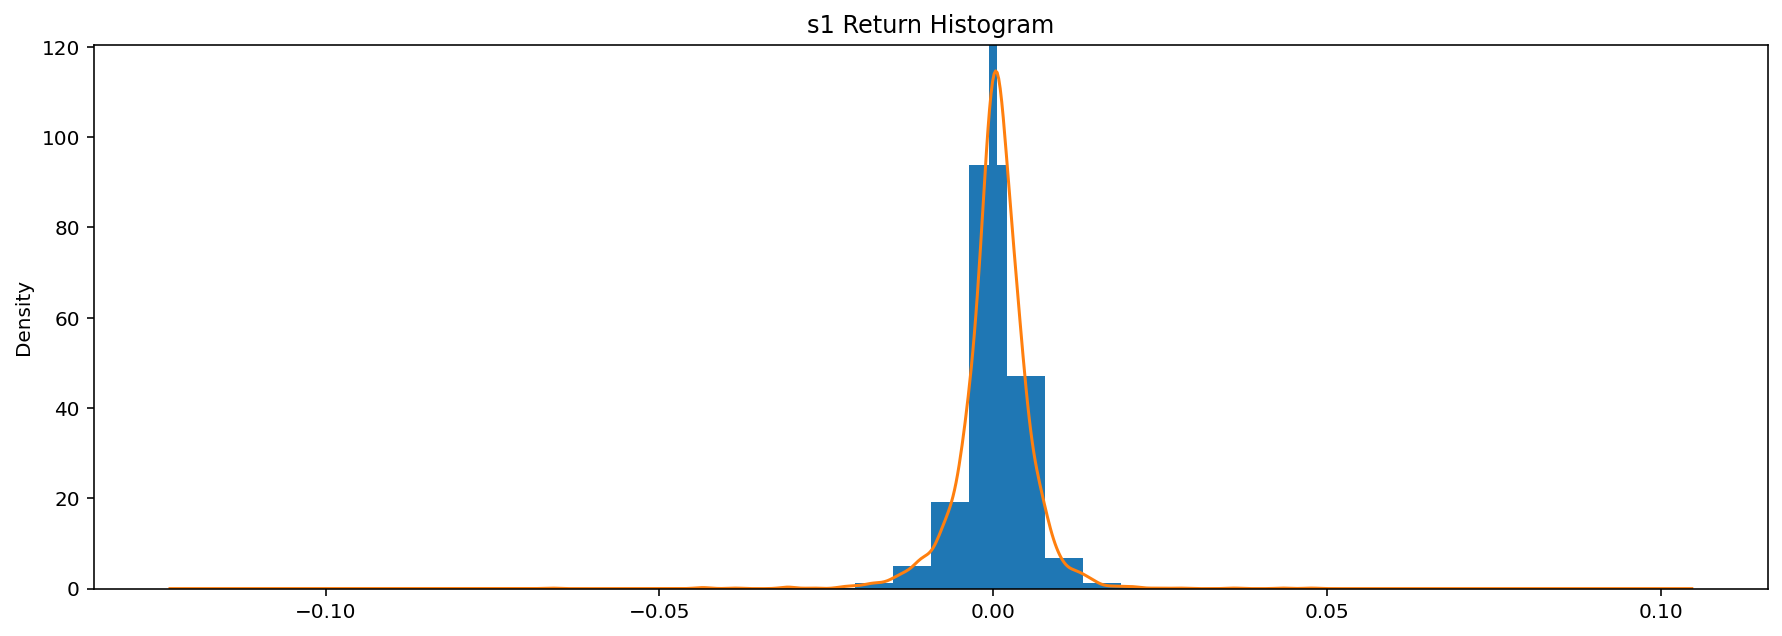

In [17]:
# ok and how does the return distribution look like?
res.plot_histogram()

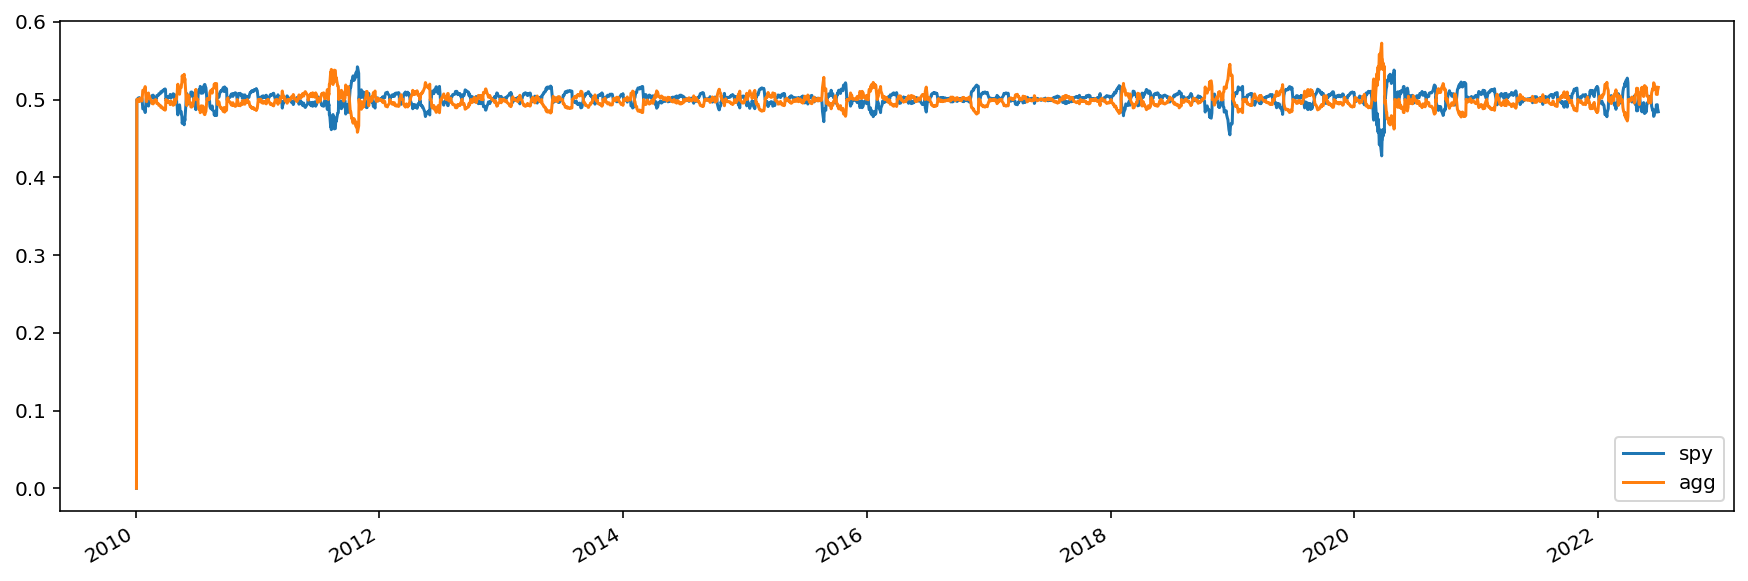

In [18]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

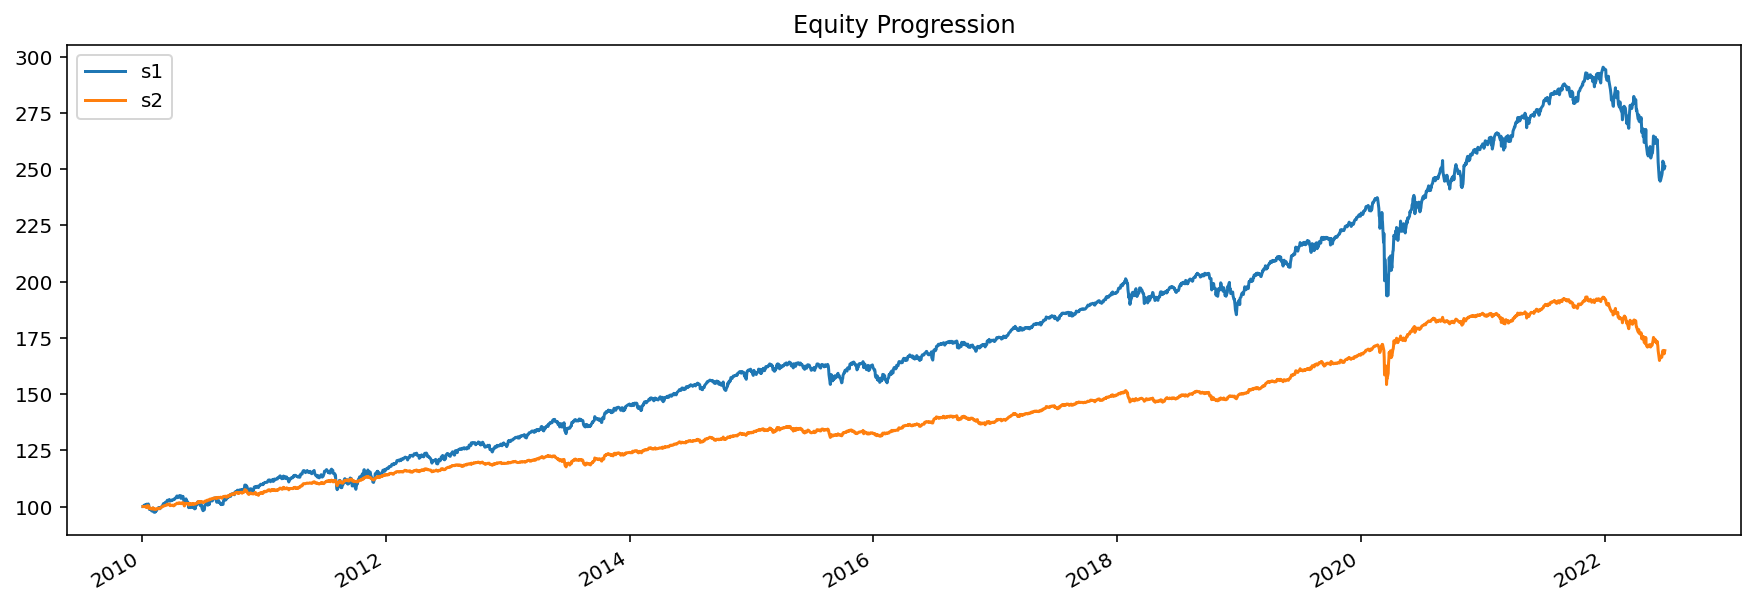

In [20]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot();

In [21]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2022-06-30  2022-06-30
Risk-free rate       0.00%       0.00%

Total Return         151.12%     69.32%
Daily Sharpe         0.90        0.96
Daily Sortino        1.36        1.41
CAGR                 7.65%       4.31%
Max Drawdown         -18.42%     -14.62%
Calmar Ratio         0.42        0.29

MTD                  -4.58%      -2.76%
3m                   -10.89%     -7.46%
6m                   -14.83%     -12.20%
YTD                  -14.71%     -12.13%
1Y                   -9.78%      -10.10%
3Y (ann.)            5.18%       1.79%
5Y (ann.)            6.47%       3.30%
10Y (ann.)           7.38%       3.75%
Since Incep. (ann.)  7.65%       4.31%

Daily Sharpe         0.90        0.96
Daily Sortino        1.36        1.41
Daily Mean (ann.)    7.75%       4.32%
Daily Vol (ann.)     8.62%       4.50%
Daily Skew           -0.98       -2.21
Dail